# Australia rainfall prediction

In [79]:
import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")

# Loading data

In [80]:
data = pd.read_csv('PATH_TO_CSV_FILE')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [81]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

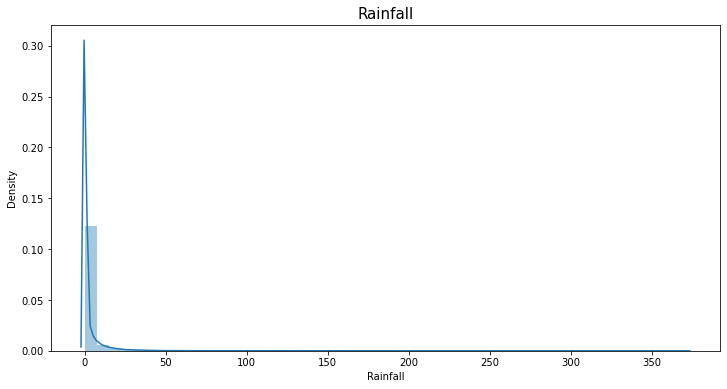

In [83]:
plt.figure(figsize=(12, 6))
sns.distplot(data.Rainfall)
plt.title('Rainfall', fontsize=15)
plt.show()

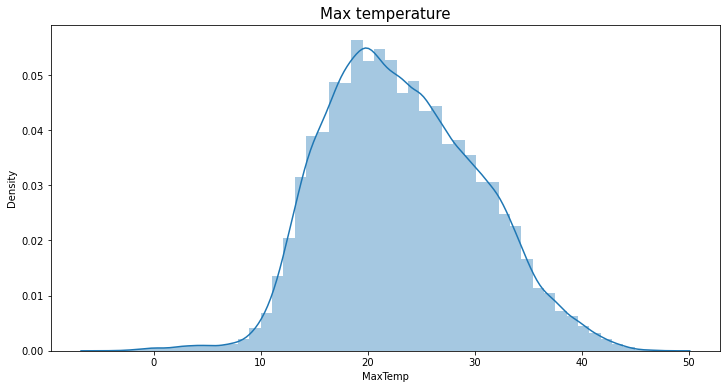

In [84]:
plt.figure(figsize=(12, 6))
sns.distplot(data.MaxTemp)
plt.title('Max temperature', fontsize=15)
plt.show()

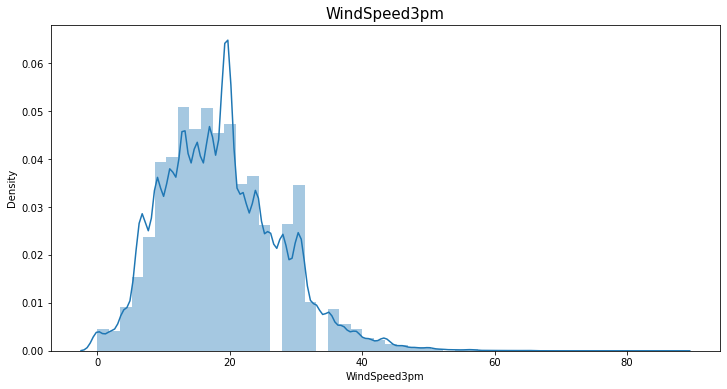

In [85]:
plt.figure(figsize=(12, 6))
sns.distplot(data.WindSpeed3pm)
plt.title('WindSpeed3pm', fontsize=15)
plt.show()

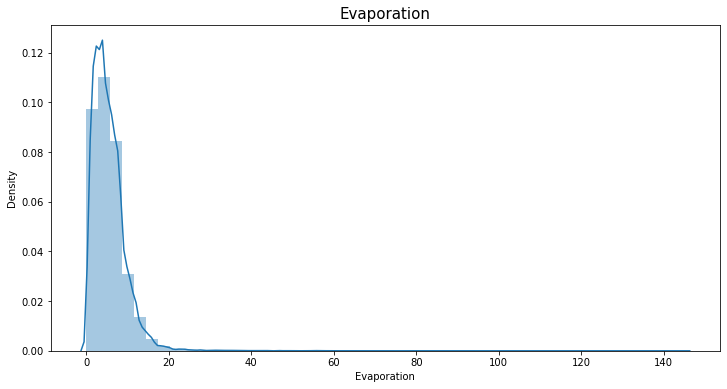

In [88]:
plt.figure(figsize=(12, 6))
sns.distplot(data.Evaporation)
plt.title('Evaporation', fontsize=15)
plt.show()

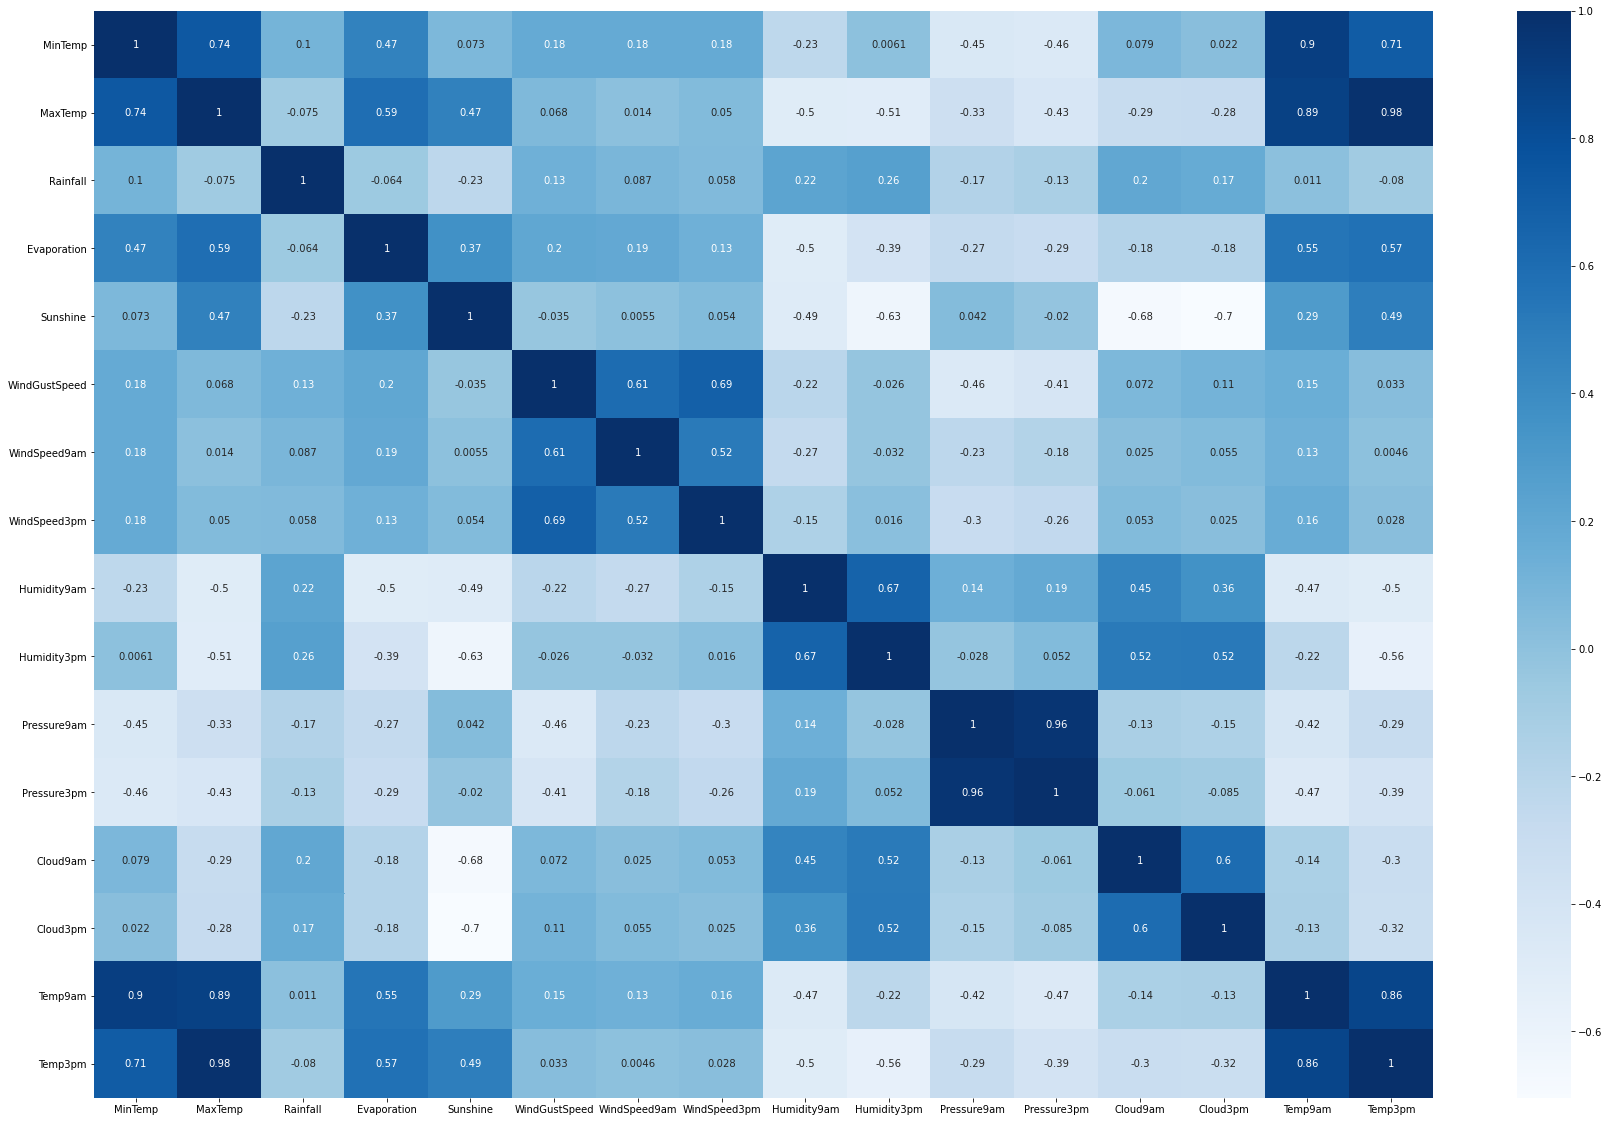

In [152]:
# Feature correlation
plt.figure(figsize=(30,20))
corr_mx = data.corr()
sns.heatmap(corr_mx, annot=True, cmap=plt.cm.Blues)
plt.show()

In [156]:
print('Target variable distribution: ', Counter(data['RainTomorrow']))

Target variable distribution:  Counter({'No': 110316, 'Yes': 31877, nan: 3267})


# Data cleaning and preprocessing

In [89]:
# removeing rows where there is no rain today or tomorrow
data_Xy = data[data['RainTomorrow'].notnull() & data['RainToday'].notnull()]

# filling missing wind directions with most frequent ones
for col_name in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    data_Xy[col_name] = np.where(data_Xy[col_name].isnull(), data_Xy[col_name].mode()[0], data_Xy[col_name])

# binary encoding
data_Xy['RainToday'] = np.where(data_Xy['RainToday'] == 'No' , 0, 1)
data_Xy['RainTomorrow'] = np.where(data_Xy['RainTomorrow'] == 'No' , 0, 1)

# filling missing numeric values
for col_name in data_Xy.select_dtypes('float64').columns:
    data_Xy[col_name].fillna(data_Xy[col_name].median(), inplace=True)
    
# extracting month and day from date
data_Xy['Month'] = pd.to_datetime(data_Xy['Date']).dt.month
data_Xy['Day'] = pd.to_datetime(data_Xy['Date']).dt.day

# encoding cyclical features
data_Xy['sin_Day'] = np.sin(2 * np.pi * data_Xy['Day'] / 31)
data_Xy['cos_Day'] = np.cos(2 * np.pi * data_Xy['Day'] / 31)
data_Xy['sin_Month'] = np.sin(2 * np.pi * data_Xy['Month'] / 12)
data_Xy['cos_Month'] = np.cos(2 * np.pi * data_Xy['Month'] / 12)

# droping columns that have too many missing values or wont be usefull
data_Xy = data_Xy.drop(columns=['Date'])

data_Xy = data_Xy.reset_index(drop=True)

**Encoding categorical features**

In [90]:
# Encoding wind directions
wind_dir_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
wind_dir_arr = OrdinalEncoder().fit_transform(data_Xy[wind_dir_cols])
wind_dir_df = pd.DataFrame(wind_dir_arr, columns=['WindGustDir_enc', 'WindDir9am_enc', 'WindDir3pm_enc'])

# Encoding locations
loc_arr = LabelEncoder().fit_transform(data_Xy['Location'])
loc_df = pd.DataFrame(loc_arr, columns=['location_enc'])

data_Xy = pd.concat([data_Xy, wind_dir_df, loc_df], axis=1)
data_Xy = data_Xy.drop(columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Month', 'Day'])
data_Xy.shape

(140787, 26)

**Splitting data into training, validation and test set before**

In [124]:
X = data_Xy.drop(columns='RainTomorrow', axis=1)
y = data_Xy['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    shuffle=True,
    random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.25,
    stratify=y_train,
    shuffle=True,
    random_state=42
)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(84471, 25)
(28158, 25)
(28158, 25)


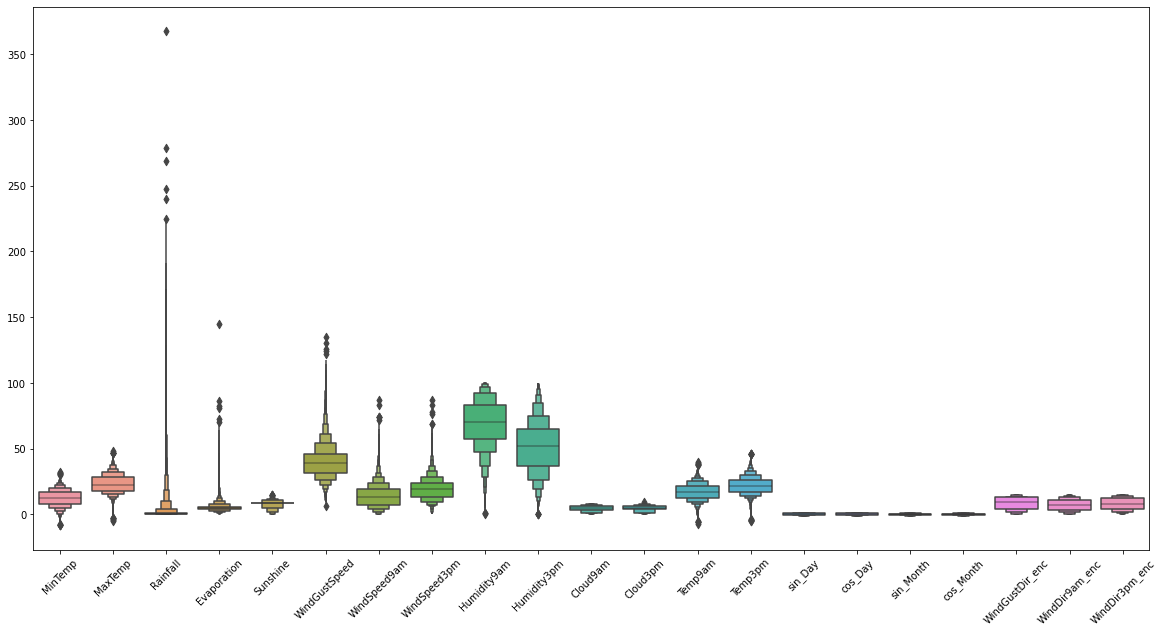

In [95]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_train.select_dtypes('float64').drop(columns=['Pressure9am', 'Pressure3pm']))
plt.xticks(rotation=45)
plt.show()

In [125]:
# removeing alarming outliers
Xy_train = pd.concat([X_train, y_train], axis=1)
    
Xy_train = Xy_train[Xy_train['Rainfall'] < 100.0]    
Xy_train = Xy_train[Xy_train['Evaporation'] < 65.0]
Xy_train = Xy_train[Xy_train['WindGustSpeed'] < 100.0]
Xy_train = Xy_train[Xy_train['WindSpeed9am'] < 65.0]
Xy_train = Xy_train[Xy_train['WindSpeed3pm'] < 55.0]
Xy_train = Xy_train[Xy_train['Humidity9am'] > 10.0]
Xy_train = Xy_train[Xy_train['Humidity3pm'] > 5.0]
Xy_train = Xy_train[Xy_train['Evaporation'] < 50.0]

X_train = Xy_train.drop('RainTomorrow', axis=1)
y_train = Xy_train['RainTomorrow']

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

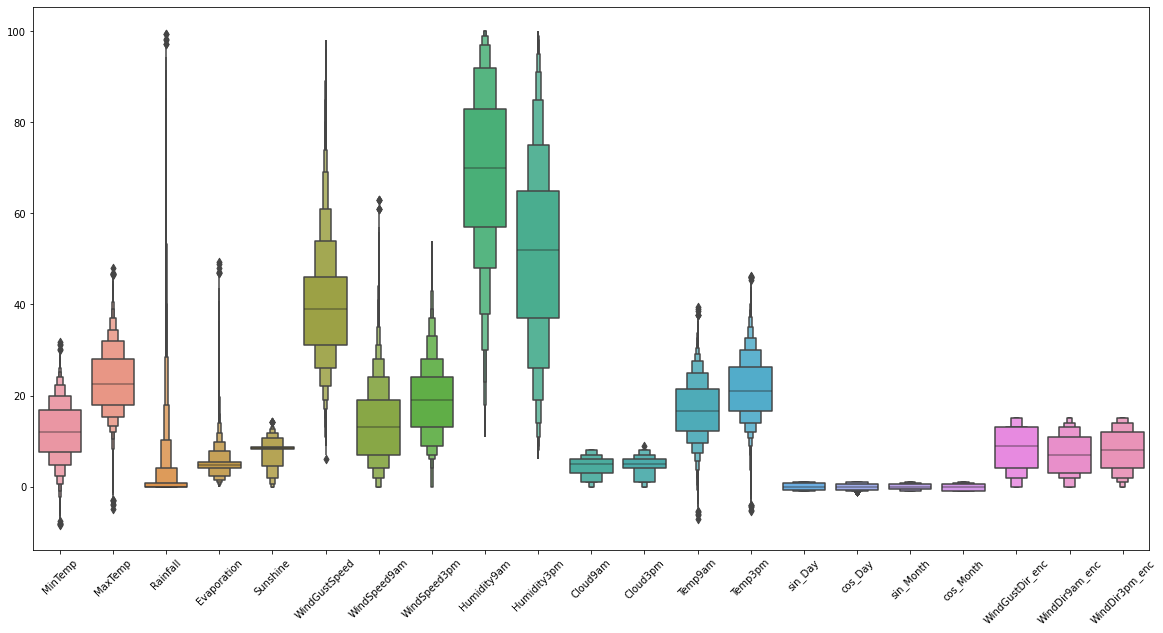

In [97]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = Xy_train.select_dtypes('float64').drop(columns=['Pressure9am', 'Pressure3pm']))
plt.xticks(rotation=45)
plt.show()

In [127]:
# scalling numerical features
def scale_features(X, scaler):
    X_data = X.iloc[:, list(range(0, 16))]
    scaled_data = scaler.transform(X_data)
    scaled_data = pd.DataFrame(scaled_data, columns=X_data.columns)
    X[X_data.columns] = scaled_data
    return X

std_sc = StandardScaler().fit(X_train.iloc[:, list(range(0, 16))])

X_train = scale_features(X_train, std_sc)
X_val = scale_features(X_val, std_sc)
X_test = scale_features(X_test, std_sc)

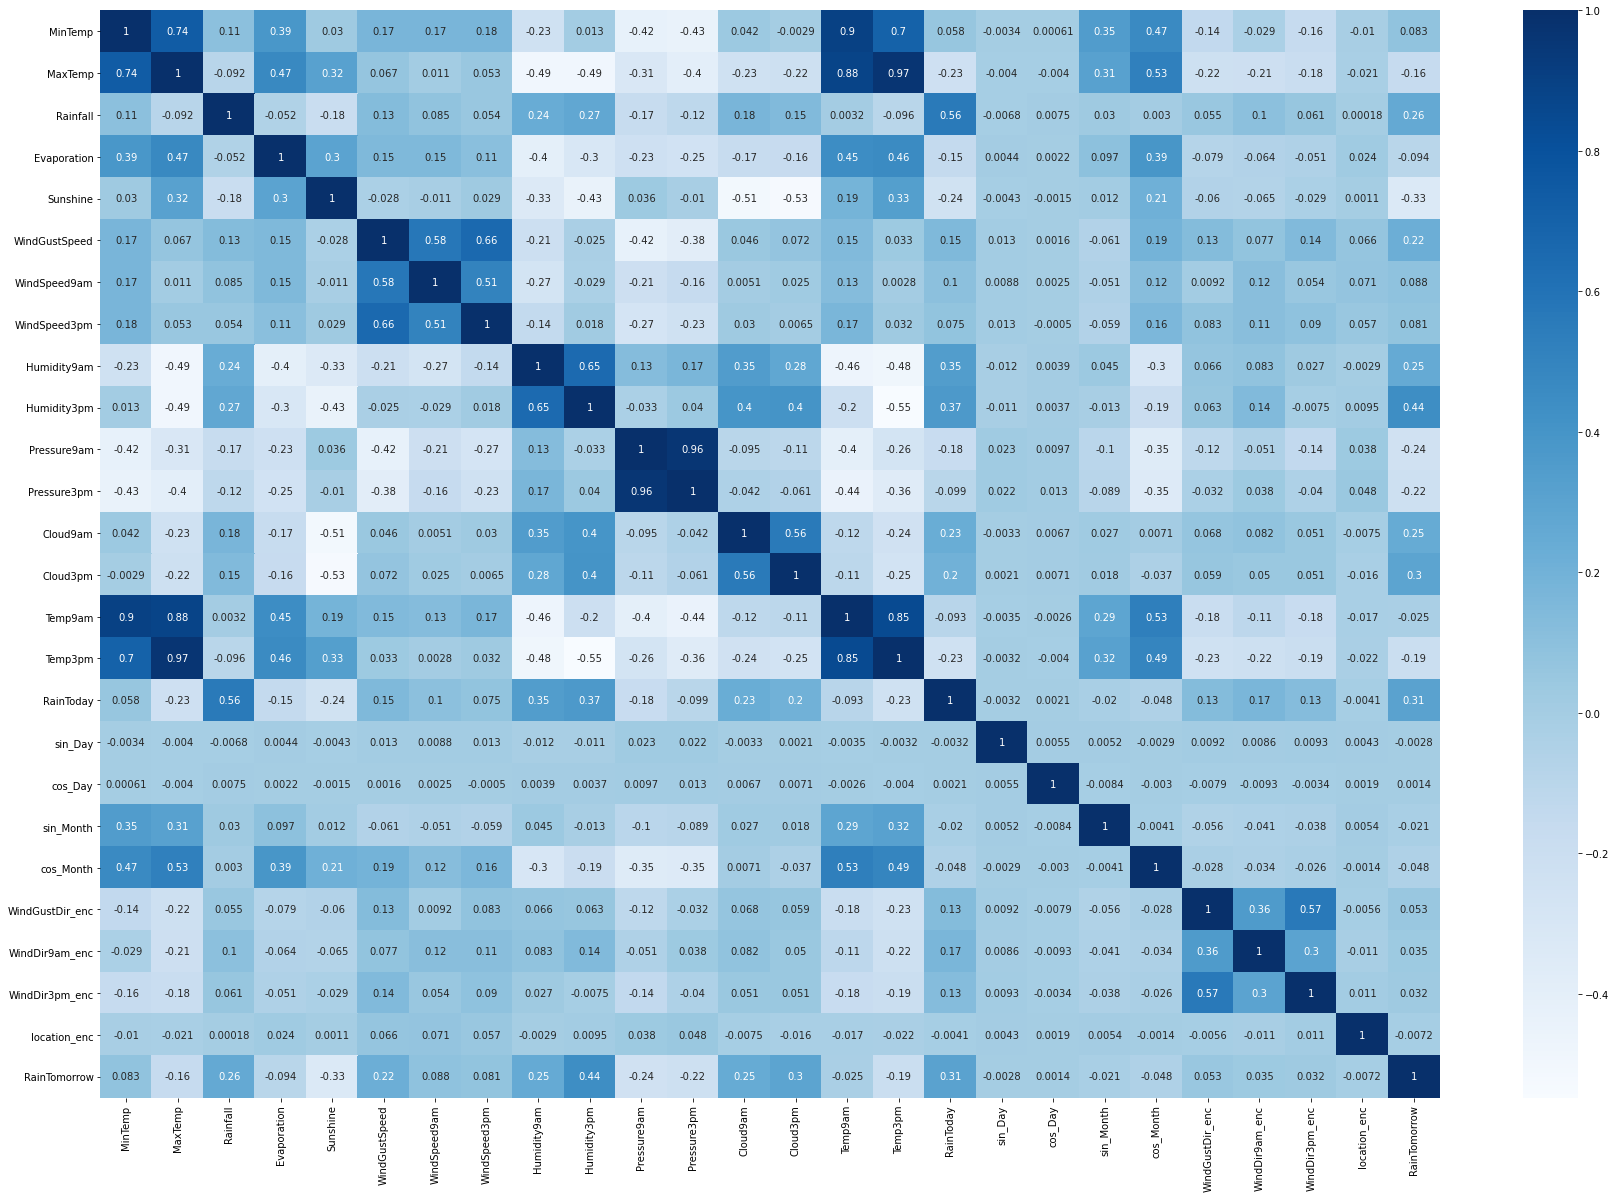

In [102]:
# Correlation Matrix
plt.figure(figsize=(30,20))
corr_mx = Xy_train.corr()
sns.heatmap(corr_mx, annot=True, cmap=plt.cm.Blues)
plt.show()

# Model building and training

Epoch 1/30
2620/2620 [==============================] - 7s 2ms/step - loss: 0.3997 - accuracy: 0.8232 - val_loss: 0.3579 - val_accuracy: 0.8453
Epoch 2/30
2620/2620 [==============================] - 6s 2ms/step - loss: 0.3555 - accuracy: 0.8444 - val_loss: 0.3544 - val_accuracy: 0.8436
Epoch 3/30
2620/2620 [==============================] - 6s 2ms/step - loss: 0.3533 - accuracy: 0.8473 - val_loss: 0.3515 - val_accuracy: 0.8461
Epoch 4/30
2620/2620 [==============================] - 6s 2ms/step - loss: 0.3537 - accuracy: 0.8464 - val_loss: 0.3532 - val_accuracy: 0.8452
Epoch 5/30
2620/2620 [==============================] - 6s 2ms/step - loss: 0.3507 - accuracy: 0.8465 - val_loss: 0.3493 - val_accuracy: 0.8478
Epoch 6/30
2620/2620 [==============================] - 6s 2ms/step - loss: 0.3463 - accuracy: 0.8493 - val_loss: 0.3497 - val_accuracy: 0.8480
Epoch 7/30
2620/2620 [==============================] - 6s 2ms/step - loss: 0.3462 - accuracy: 0.8486 - val_loss: 0.3600 - val_accuracy:

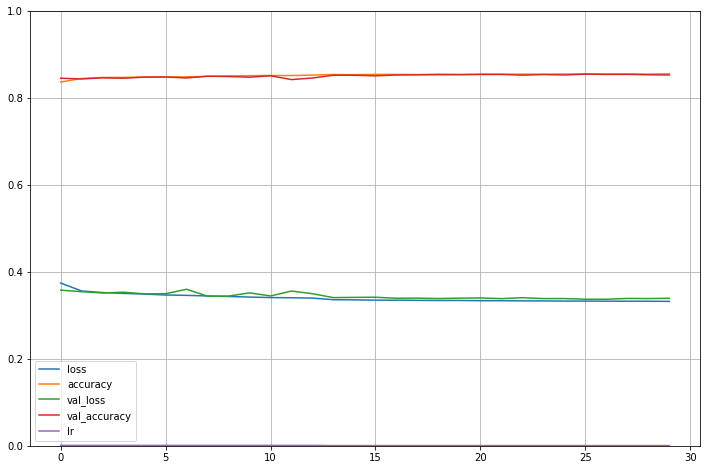

In [139]:
def build_model():
    act = 'selu'
    init = keras.initializers.GlorotNormal()
    
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(19, input_dim=25, activation=act, kernel_initializer=init))
    for neurons in (6 * [9]):
        model.add(keras.layers.Dense(neurons, activation=act, kernel_initializer=init))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=keras.optimizers.Nadam(0.001),
        metrics=['accuracy']
    )
    
    return model

model = build_model()
checkpoint_cb = keras.callbacks.ModelCheckpoint("last_model.h5", save_best_only=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=30,
    callbacks=[checkpoint_cb, lr_scheduler]
)

pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluation

880/880 [==============================] - 1s 1ms/step - loss: 0.3371 - accuracy: 0.8553
Accuracy (train):  0.8557914827627341
Accuracy (test):  0.8553164287236309
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     21918
           1       0.74      0.54      0.62      6240

    accuracy                           0.86     28158
   macro avg       0.81      0.74      0.77     28158
weighted avg       0.85      0.86      0.85     28158



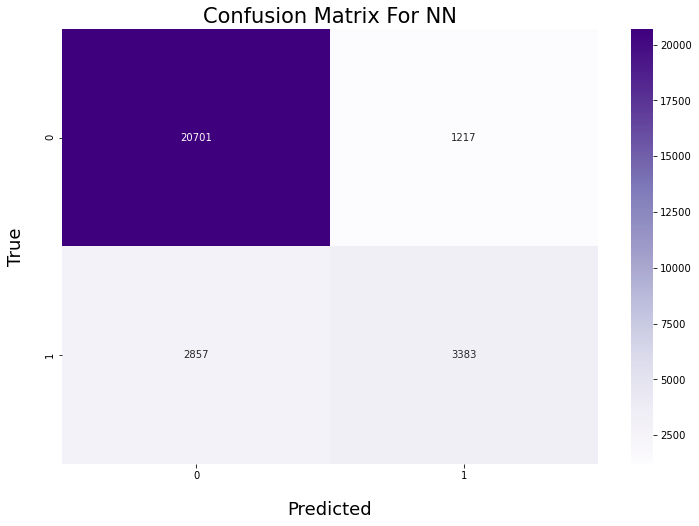

In [157]:
best_model = keras.models.load_model('last_model.h5')
best_model.evaluate(X_test, y_test)

y_pred = best_model.predict(X_test).round()
y_pred_train = best_model.predict(X_train_t).round()
conf_mx = confusion_matrix(y_test, y_pred)

print('Accuracy (train): ', accuracy_score(y_train_t, y_pred_train))
print('Accuracy (test): ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix

plt.figure(figsize=(10,8))
sns.heatmap(
    conf_mx,
    fmt='2d',
    annot=True,
    cmap='Purples'
)
plt.xlabel('Predicted', labelpad=20 ,fontsize=18)
plt.ylabel('True', labelpad=20, fontsize=18)
plt.title('Confusion Matrix For NN', fontsize=21)
plt.show()